# Verifica 
## Numpy

## Menardi Samuele

In [1]:
import numpy as np

In [2]:
# NON CANCELLARE QUESTO CODICE
np.random.seed(1234567)
prezzo = 50. + np.cumsum(np.random.normal(0,1.,100))

# Esercizio 1

Ogni giorno tu e un tuo compagno vi giocate la merenda giornaliera lanciando due dadi a sei facce. Ogni giorno, la merenda è tua se dopo un certo numero `n_lanci` di lanci dei due dadi esce un valore maggiore o uguale a 10. Supponendo 200 giorni di scuola totali, scrivi una funzione che:
- faccia uso di della libreria `numpy`;
- abbia `n_lanci` come parametro;
- restituisca il numero totale di giorni in cui vinci tu la merenda, simulando i lanci dei dadi per i 200 giorni di scuola.

**[BONUS]** Quanto deve valere `n_lanci` affinchè il gioco sia equo?

In [ ]:
giorni_di_scuola = 200
n_lanci = 4

In [ ]:
bob = np.random.randint(1, 7, (200, n_lanci)) + np.random.randint(1, 7, (200, n_lanci))
alice = np.random.randint(1, 7, (200, n_lanci)) + np.random.randint(1, 7, (200, n_lanci))

In [ ]:
def n_vittorie_bob(bob, alice):
    report_bob = (bob > alice) & (bob >= 10)
    report_alice = (alice > bob) & (alice >= 10)
    
    indici = np.zeros((giorni_di_scuola, n_lanci), dtype = "int16")
    indici[ : ] = np.arange(0, n_lanci)
    
    array_indice_bob = np.zeros((giorni_di_scuola, n_lanci), dtype = "int16") + n_lanci
    array_indice_alice = np.zeros((giorni_di_scuola, n_lanci), dtype = "int16") + n_lanci
    
    array_indice_bob[report_bob == True] = indici[report_bob == True]
    array_indice_alice[report_alice == True] = indici[report_alice == True]
    
    return np.count_nonzero(np.min(array_indice_bob, axis = 1) < np.min(array_indice_alice, axis = 1))

In [ ]:
print(f"Bob ha vinto {n_vittorie_bob(bob, alice)} volte")

# Esercizio 2

Creare un notebook jupyter che a partire dal testo contenuto nel file ___"J_Verne_girodelmondoin80giorni.txt"___:

1. crei un dizionario delle frequenze per ciascun carattere (**line feed escluso**); 
2. crei il dizionario delle adiacenze per ciascun carattere (**line feed escluso**);
3. **[FACOLTATIVO]** crei un indice dei capitoli. Ogni capitolo inizia riportando il numero romano del capitolo e il suo titolo in questo modo:

>CAPITOLO XXIX.
>
>Nel quale si narrano cose che capitano unicamente sulle ferrovie
>americane.

In [ ]:
with open("J_Verne_girodelmondoin80giorni.txt", "r", encoding="utf-8") as file:
    testo = file.read()
testo_feed_escluso = testo.replace("\n", " ")

In [ ]:
lista_caratteri = [carattere for carattere in testo_feed_escluso]

In [ ]:
dizionario_frequenze = {}
for carattere in lista_caratteri:
    if carattere not in dizionario_frequenze:
        dizionario_frequenze[carattere] = 1
    else:
        dizionario_frequenze[carattere] += 1

In [ ]:
dizionario_adiacenze = {}
for indice, carattere in enumerate(lista_caratteri[ : -1]):
    if carattere not in dizionario_adiacenze:
        dizionario_adiacenze[carattere] = []
        dizionario_adiacenze[carattere].append(lista_caratteri[indice + 1])
    else:
        if lista_caratteri[indice + 1] not in dizionario_adiacenze[carattere]:
            dizionario_adiacenze[carattere].append(lista_caratteri[indice + 1])

In [ ]:
righe = testo.split("\n")
for indice, riga in enumerate(righe[ : -1]):
    if "CAPITOLO" in riga:
        print(riga)
        riga_ = righe[indice + 2]
        cont = 2
        while riga_ != "\n":
            riga_ = righe[indice + cont]
            print(riga_)
            cont += 1

# Esercizio 3

In una classe di 27 alunni ogni alunno riceve 10 valutazioni di una materia assegnate a caso. Le valutazioni possibili sono comprese tra 2 e 10, inclusi gli estremi, e non sono ammessi i mezzi voti.
Utilizza numpy per simulare i 27 x 10 voti.
Calcola quanti alunni hanno un voto medio > 6.

In [3]:
n_alunni = 27
n_voti = 10
voti = np.random.randint(2, 11, (n_alunni, n_voti))

In [4]:
media = np.mean(voti, axis = 1)

In [5]:
print(f"Gli alunni con media sufficiente sono {np.count_nonzero(media >= 6)}")

Gli alunni con media sufficiente sono 12


# Esercizio 4

L'array prezzo definito nella cella sottostante contiene una serie storica giornaliera di un prezzo in Euro. La serie storica ricopre in periodo di 100 giorni
Conta il numero di giorni in cui il prezzo è maggiore di 55 euro.
Trova i minimi locali del prezzo.
Crea un nuovo array identico a prezzo, ma in cui sostituisci il valore 50 a tutti i prezzi che nell'array originale sono inferiori a 50 euro.
Traccia un grafico dell'andamento del prezzo così ottenuto.

In [6]:
import matplotlib.pyplot as plt

In [7]:
print(f"Il numero di giorni in cui il prezzo è maggiore di 55 euro è {np.count_nonzero(prezzo > 55)}")

Il numero di giorni in cui il prezzo è maggiore di 55 euro è 4


In [8]:
prezzo_dx = np.roll(prezzo, 1)
prezzo_sx = np.roll(prezzo, -1)
minimo_locale = prezzo[(prezzo < prezzo_dx) & (prezzo < prezzo_sx)]

In [9]:
minimo_locale

array([49.03582083, 49.74863996, 49.26564544, 50.30364023, 50.09490927,
       49.70300206, 49.18410163, 47.08448568, 48.44212718, 46.26516518,
       47.01281757, 46.28160029, 46.64567769, 47.84712187, 47.89981415,
       48.21879844, 48.81167114, 49.003246  , 50.90703026, 49.30179169,
       49.43537751, 48.68825033, 48.80971259, 51.93003099, 54.4031699 ,
       54.25667074, 51.4904639 , 53.24669708])

In [10]:
prezzo_modificato = prezzo.copy()
prezzo_modificato[(prezzo < 50)] = 50.00

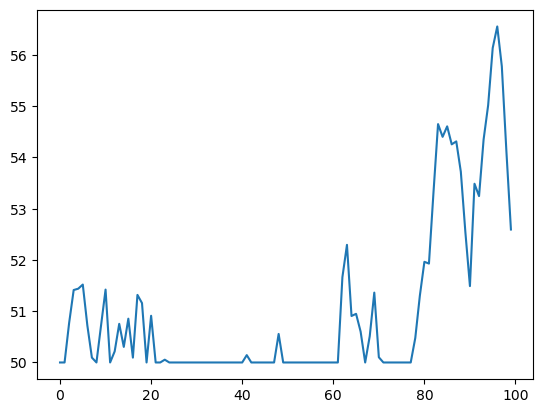

In [11]:
plt.plot(prezzo_modificato)